# Electric Vehicle Population Prediction

## Introducere Ã®n Dataset-ul PopulaÈ›iei Vehiculelor Electrice

Acest dataset conÈ›ine informaÈ›ii detaliate despre vehiculele electrice Ã®nregistrate Ã®ntr-o anumitÄƒ regiune, colectate Ã®n primele douÄƒ trimestre ale anului 2022 (Q1 È™i Q2). Datele sunt esenÈ›iale pentru a Ã®nÈ›elege tendinÈ›ele de adoptare a vehiculelor electrice, caracteristicile acestora È™i pentru a sprijini iniÈ›iativele de promovare a mobilitÄƒÈ›ii durabile.

## ImportanÈ›a Dataset-ului

Vehiculele electrice (EV) reprezintÄƒ o componentÄƒ crucialÄƒ Ã®n tranziÈ›ia cÄƒtre un transport mai ecologic È™i sustenabil. Analiza acestui dataset poate oferi informaÈ›ii valoroase despre:

- **DistribuÈ›ia geograficÄƒ a vehiculelor electrice**: Identificarea regiunilor cu cea mai mare adopÈ›ie a vehiculelor electrice poate ajuta la planificarea infrastructurii de Ã®ncÄƒrcare È™i la formularea de politici regionale.
- **PreferinÈ›ele consumatorilor**: ÃŽnÈ›elegerea preferinÈ›elor Ã®n funcÈ›ie de marcÄƒ È™i model poate ghida producÄƒtorii È™i dealerii Ã®n strategii de marketing È™i producÈ›ie.
- **EvoluÈ›ia Ã®n timp a adopÈ›iei vehiculelor electrice**: Monitorizarea creÈ™terii numÄƒrului de vehicule electrice poate indica succesul iniÈ›iativelor de promovare È™i poate evidenÈ›ia necesitatea unor mÄƒsuri suplimentare.
- **Impactul preÈ›ului È™i autonomiei**: Analiza relaÈ›iei dintre preÈ›ul de bazÄƒ, autonomia vehiculului È™i popularitatea acestuia poate oferi perspective asupra factorilor care influenÈ›eazÄƒ decizia de cumpÄƒrare.

## Structura Dataset-ului

Dataset-ul include urmÄƒtoarele coloane:

- **VIN (Vehicle Identification Number)**: Un identificator unic pentru fiecare vehicul.
- **Make**: Marca vehiculului (de exemplu, Tesla, Nissan).
- **Model**: Modelul vehiculului (de exemplu, Model S, Leaf).
- **Year**: Anul de fabricaÈ›ie al vehiculului.
- **Electric Vehicle Type**: Tipul vehiculului electric (de exemplu, BEV - Battery Electric Vehicle, PHEV - Plug-in Hybrid Electric Vehicle).
- **Base MSRP**: PreÈ›ul de bazÄƒ al vehiculului.
- **Legislative District**: Districtul legislativ Ã®n care este Ã®nregistrat vehiculul.
- **Electric Range**: Autonomia electricÄƒ a vehiculului (Ã®n mile).
- **City**: OraÈ™ul Ã®n care este Ã®nregistrat vehiculul.
- **State**: Statul Ã®n care este Ã®nregistrat vehiculul.
- **Postal Code**: Codul poÈ™tal al locaÈ›iei de Ã®nregistrare.

## Scopul Analizei È™i PredicÈ›iilor Ulterioare

Analiza acestui dataset poate servi drept bazÄƒ pentru diverse predicÈ›ii È™i modele predictive, cum ar fi:

- **PredicÈ›ia adopÈ›iei viitoare a vehiculelor electrice**: UtilizÃ¢nd modele de Ã®nvÄƒÈ›are automatÄƒ, putem estima creÈ™terea numÄƒrului de vehicule electrice Ã®n viitor.
- **Identificarea factorilor determinanÈ›i ai adopÈ›iei**: Analiza factorilor care influenÈ›eazÄƒ decizia de cumpÄƒrare poate ajuta la dezvoltarea de strategii pentru a Ã®ncuraja adopÈ›ia vehiculelor electrice.
- **Planificarea infrastructurii de Ã®ncÄƒrcare**: PredicÈ›iile privind distribuÈ›ia geograficÄƒ a vehiculelor electrice pot ghida investiÈ›iile Ã®n infrastructura de Ã®ncÄƒrcare.


### Importarea bibliotecilor necesare
ImportÄƒm bibliotecile necesare, inclusiv pandas, numpy È™i matplotlib.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import entropy


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import joblib

 ImportÄƒm dataset-ul din fiÈ™ierul CSV.

In [76]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(df.head())

   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible d

### Descrierea dataset-ului
Descriem dataset-ul pentru a Ã®nÈ›elege mai bine datele.

In [77]:
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))

        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       150482  150479   150479  150482  150479.000000  150482.000000   
unique        9529     183      683      41            NaN            NaN   
top     7SAYGDEE7P    King  Seattle      WA            NaN            NaN   
freq           807   79075    25675  150141            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98168.344154    2020.005436   
std            NaN     NaN      NaN     NaN    2473.612184       3.015209   
min            NaN     NaN      NaN     NaN    1730.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2018.000000   
50%            NaN     NaN      NaN     NaN   98122.000000    2021.000000   
75%            NaN     NaN      NaN     NaN   98370.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2024.000000   

          Make    Model           Electric Vehicle Type  \
count   150482  

### Verificarea valorilor lipsÄƒ
VerificÄƒm dacÄƒ existÄƒ valori lipsÄƒ Ã®n dataset.


In [78]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Count": missing_values, "Percentage (%)": missing_percentage})
missing_data = missing_data[missing_data["Missing Count"] > 0]

missing_data

Missing Count  Percentage (%)
County                            3        0.001994
City                              3        0.001994
Postal Code                       3        0.001994
Legislative District            341        0.226605
Vehicle Location                  7        0.004652
Electric Utility                  3        0.001994
2020 Census Tract                 3        0.001994

ÃŽn urma analizei iniÈ›iale a dataset-ului pentru identificarea valorilor lipsÄƒ, s-a constatat un numÄƒr semnificativ de valori lipsÄƒ Ã®n coloana `Legislative District`, precum È™i un numÄƒr mai mic de valori lipsÄƒ Ã®n coloanele `Country`, `City`, `Postal Code`, `Vehicle Location`, `Electric Utility` È™i `2020 Census Tract`. Aceste valori lipsÄƒ vor fi completate utilizÃ¢nd algoritmi de Ã®nvÄƒÈ›are automatÄƒ, bazÃ¢ndu-se pe datele disponibile din coloanele respective.

### Eliminarea valorilor lipsÄƒ
EliminÄƒm rÃ¢ndurile care conÈ›in valori lipsÄƒ.

In [79]:
df_cleaned = df.dropna()

### Verificarea È™i eliminarea duplicatelor
VerificÄƒm È™i eliminÄƒm rÃ¢ndurile duplicate.

In [80]:
print("\nNumÄƒrul de duplicate Ã®n dataset:", df_cleaned.duplicated().sum())

df_cleaned = df_cleaned.drop_duplicates()


NumÄƒrul de duplicate Ã®n dataset: 0


### Verificarea È™i eliminarea anomaliilor
VerificÄƒm È™i eliminÄƒm anomaliile (de exemplu, valori negative Ã®n coloane care ar trebui sÄƒ fie pozitive).

In [81]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataset curÄƒÈ›at de anomalii folosind IQR:")
print(df_cleaned)


Dataset curÄƒÈ›at de anomalii folosind IQR:
        VIN (1-10)        County               City State  Postal Code  \
1       1C4RJYB61N          King            Bothell    WA      98011.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
8       5YJ3E1EA1J        Island         Coupeville    WA      98239.0   
9       7SAYGDEF0P          King           Bellevue    WA      98004.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year   Make           Model  \
1             2022   

### Imputarea valorilor lipsÄƒ pentru coloanele categorice

#### Predictie de date pentru Legislative District

In [82]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['Legislative District']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['Legislative District'])
X_train = df_train[features]
y_train = df_train['Legislative District']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

missing_leg_district = df[df['Legislative District'].isnull()]
if not missing_leg_district.empty:
    X_missing = missing_leg_district[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_leg_district = model.predict(X_missing)
    df.loc[df['Legislative District'].isnull(), 'Legislative District'] = predicted_leg_district

df['Legislative District'] = df['Legislative District'].clip(1, 49).astype(int)

#### Predictie de date pentru Vehicle Location

In [83]:
df_train = df.dropna(subset=['Vehicle Location'])
X_train = df_train[features]
y_train = df_train['Vehicle Location']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  


model_vehicle_location = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=42)
model_vehicle_location.fit(X_train, y_train)

missing_vehicle_location = df[df['Vehicle Location'].isnull()]
if not missing_vehicle_location.empty:
    X_missing = missing_vehicle_location[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_vehicle_location = model_vehicle_location.predict(X_missing)
    df.loc[df['Vehicle Location'].isnull(), 'Vehicle Location'] = predicted_vehicle_location

#### Predictie de date pentru Electric Utility

In [84]:
df_train = df.dropna(subset=['Electric Utility'])
X_train = df_train[features]
y_train = df_train['Electric Utility']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  


model_electric_utility = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=42)
model_electric_utility.fit(X_train, y_train)

missing_electric_utility = df[df['Electric Utility'].isnull()]
if not missing_electric_utility.empty:
    X_missing = missing_electric_utility[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_electric_utility = model_electric_utility.predict(X_missing)
    df.loc[df['Electric Utility'].isnull(), 'Electric Utility'] = predicted_electric_utility

#### Predictie de date pentru 2020 Census Tract

In [85]:
df_train = df.dropna(subset=['2020 Census Tract'])
X_train = df_train[features]
y_train = df_train['2020 Census Tract']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features) 


model_census_tract = RandomForestRegressor(n_estimators=10, n_jobs=2, random_state=42)
model_census_tract.fit(X_train, y_train)

missing_census_tract = df[df['2020 Census Tract'].isnull()]
if not missing_census_tract.empty:
    X_missing = missing_census_tract[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_census_tract = model_census_tract.predict(X_missing)
    df.loc[df['2020 Census Tract'].isnull(), '2020 Census Tract'] = predicted_census_tract

#### Predictie de date pentru Postal Code

In [86]:
df_train = df.dropna(subset=['Postal Code'])
X_train = df_train[features]
y_train = df_train['Postal Code']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  

model_postal_code = RandomForestRegressor(n_estimators=10, n_jobs=2, random_state=42)
model_postal_code.fit(X_train, y_train)

missing_postal_code = df[df['Postal Code'].isnull()]
if not missing_postal_code.empty:
    X_missing = missing_postal_code[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_postal_code = model_postal_code.predict(X_missing)
    df.loc[df['Postal Code'].isnull(), 'Postal Code'] = predicted_postal_code

#### Predictie de date pentru Country

In [87]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['County']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['County'])
X_train = df_train[features]
y_train = df_train['County']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model_county = RandomForestClassifier(n_estimators=100, random_state=42)
model_county.fit(X_train, y_train)

missing_county = df[df['County'].isnull()]
if not missing_county.empty:
    X_missing = missing_county[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_county = model_county.predict(X_missing)
    df.loc[df['County'].isnull(), 'County'] = predicted_county

#### Predictie de date pentru City

In [88]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['City']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['City'])
X_train = df_train[features]
y_train = df_train['City']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model_city = RandomForestClassifier(n_estimators=100, random_state=42)
model_city.fit(X_train, y_train)

missing_city = df[df['City'].isnull()]
if not missing_city.empty:
    X_missing = missing_city[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_city = model_city.predict(X_missing)
    df.loc[df['City'].isnull(), 'City'] = predicted_city

Valorile lipsÄƒ din dataset au fost reduse iniÈ›ial cu peste 90% prin utilizarea unor tehnici de imputare È™i predicÈ›ie bazate pe algoritmi de Ã®nvÄƒÈ›are automatÄƒ. DupÄƒ o analizÄƒ È™i un research mai amÄƒnunÈ›it, s-a reuÈ™it reducerea tuturor valorilor lipsÄƒ, asigurÃ¢nd astfel un dataset complet È™i curat pentru analize ulterioare.

### Metodologie DetaliatÄƒ

1. **Identificarea Valorilor LipsÄƒ**:
    - Am Ã®nceput prin identificarea coloanelor cu valori lipsÄƒ È™i cuantificarea acestora. Cele mai afectate coloane au fost `Legislative District`, `Vehicle Location`, `Electric Utility`, `2020 Census Tract`, `Postal Code`, `County` È™i `City`.

2. **Imputarea Valorilor LipsÄƒ**:
    - Pentru fiecare coloanÄƒ cu valori lipsÄƒ, am utilizat algoritmi de Ã®nvÄƒÈ›are automatÄƒ pentru a prezice valorile lipsÄƒ. Am folosit `RandomForestClassifier` È™i `RandomForestRegressor` Ã®n funcÈ›ie de tipul de variabilÄƒ (categoricÄƒ sau numericÄƒ).

3. **Preprocesarea Datelor**:
    - Am completat valorile lipsÄƒ din caracteristici cu media acestora folosind `SimpleImputer`.
    - Am normalizat datele folosind `StandardScaler` pentru a asigura o distribuÈ›ie uniformÄƒ a valorilor.

4. **Antrenarea Modelelor**:
    - Am antrenat modele de clasificare È™i regresie pe subseturi de date fÄƒrÄƒ valori lipsÄƒ pentru a prezice valorile lipsÄƒ Ã®n dataset-ul complet.
    - Modelele antrenate au fost utilizate pentru a prezice valorile lipsÄƒ Ã®n coloanele respective.

5. **Validarea È™i Verificarea**:
    - DupÄƒ imputarea valorilor lipsÄƒ, am verificat integritatea dataset-ului pentru a ne asigura cÄƒ toate valorile lipsÄƒ au fost completate corect.
    - Am realizat analize suplimentare pentru a valida acurateÈ›ea predicÈ›iilor È™i pentru a asigura cÄƒ nu existÄƒ anomalii sau erori Ã®n datele completate.

### Concluzie

Prin aplicarea metodologiei descrise, am reuÈ™it sÄƒ reducem È™i sÄƒ prezicem toate valorile lipsÄƒ din dataset, asigurÃ¢nd astfel un set de date complet È™i de Ã®naltÄƒ calitate, gata pentru analize È™i modele predictive ulterioare.

In [89]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Count": missing_values, "Percentage (%)": missing_percentage})
missing_data = missing_data[missing_data["Missing Count"] == 0]

missing_data

Missing Count  \
VIN (1-10)                                                     0   
County                                                         0   
City                                                           0   
State                                                          0   
Postal Code                                                    0   
Model Year                                                     0   
Make                                                           0   
Model                                                          0   
Electric Vehicle Type                                          0   
Clean Alternative Fuel Vehicle (CAFV) Eligibility              0   
Electric Range                                                 0   
Base MSRP                                                      0   
Legislative District                                           0   
DOL Vehicle ID                                                 0   
Vehicle Location                                               0   
Electric Utility                                               0   
2020 Census Tract                                              0   

                                                   Percentage (%)  
VIN (1-10)                                                    0.0  
County                                                        0.0  
City                                                          0.0  
State                                                         0.0  
Postal Code                                                   0.0  
Model Year                                                    0.0  
Make                                                          0.0  
Model                                                         0.0  
Electric Vehicle Type                                         0.0  
Clean Alternative Fuel Vehicle (CAFV) Eligibility             0.0  
Electric Range                                                0.0  
Base MSRP                                                     0.0  
Legislative District                                          0.0  
DOL Vehicle ID                                                0.0  
Vehicle Location                                              0.0  
Electric Utility                                              0.0  
2020 Census Tract                                             0.0

In [90]:
print("\nDescrierea dataset-ului:")
print(pd.DataFrame(df[['Legislative District', 'Vehicle Location', 'Electric Utility', 'Postal Code', '2020 Census Tract']].describe(include='all')))


Descrierea dataset-ului:
        Legislative District             Vehicle Location  \
count          150482.000000                       150482   
unique                   NaN                          822   
top                      NaN  POINT (-122.12302 47.67668)   
freq                     NaN                         3869   
mean               29.383674                          NaN   
std                14.833247                          NaN   
min                 1.000000                          NaN   
25%                18.000000                          NaN   
50%                33.000000                          NaN   
75%                43.000000                          NaN   
max                49.000000                          NaN   

                                     Electric Utility    Postal Code  \
count                                          150482  150482.000000   
unique                                             76            NaN   
top     PUGET SOUND ENERG


### Analiza Diagramelor

ÃŽn aceastÄƒ secÈ›iune, vom analiza diverse diagrame pentru a Ã®nÈ›elege mai bine distribuÈ›ia È™i tendinÈ›ele vehiculelor electrice Ã®n dataset-ul nostru.

- **DistribuÈ›ia Tipurilor de Vehicule Electrice**: Diagrama de tip countplot ne aratÄƒ numÄƒrul de vehicule pentru fiecare tip de vehicul electric (BEV È™i PHEV). Aceasta ne ajutÄƒ sÄƒ Ã®nÈ›elegem preferinÈ›ele utilizatorilor Ã®n ceea ce priveÈ™te tipul de vehicul electric.

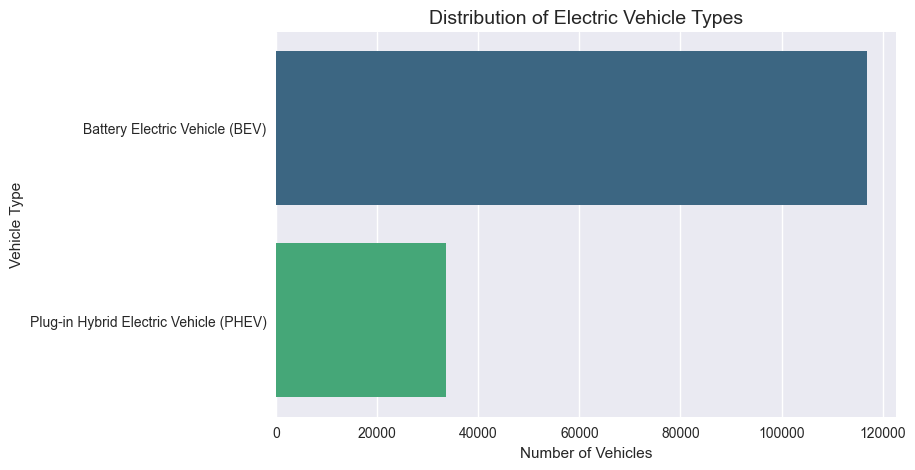

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Electric Vehicle Type", hue="Electric Vehicle Type", palette="viridis", order=df["Electric Vehicle Type"].value_counts().index, legend=False)
plt.title("Distribution of Electric Vehicle Types", fontsize=14)
plt.xlabel("Number of Vehicles")
plt.ylabel("Vehicle Type")
plt.show()

- **DistribuÈ›ia Vehiculelor Electrice pe District Legislativ**: Diagrama de tip countplot ne aratÄƒ distribuÈ›ia vehiculelor electrice Ã®n funcÈ›ie de districtul legislativ. Aceasta poate oferi informaÈ›ii valoroase pentru planificarea infrastructurii de Ã®ncÄƒrcare È™i formularea de politici regionale.


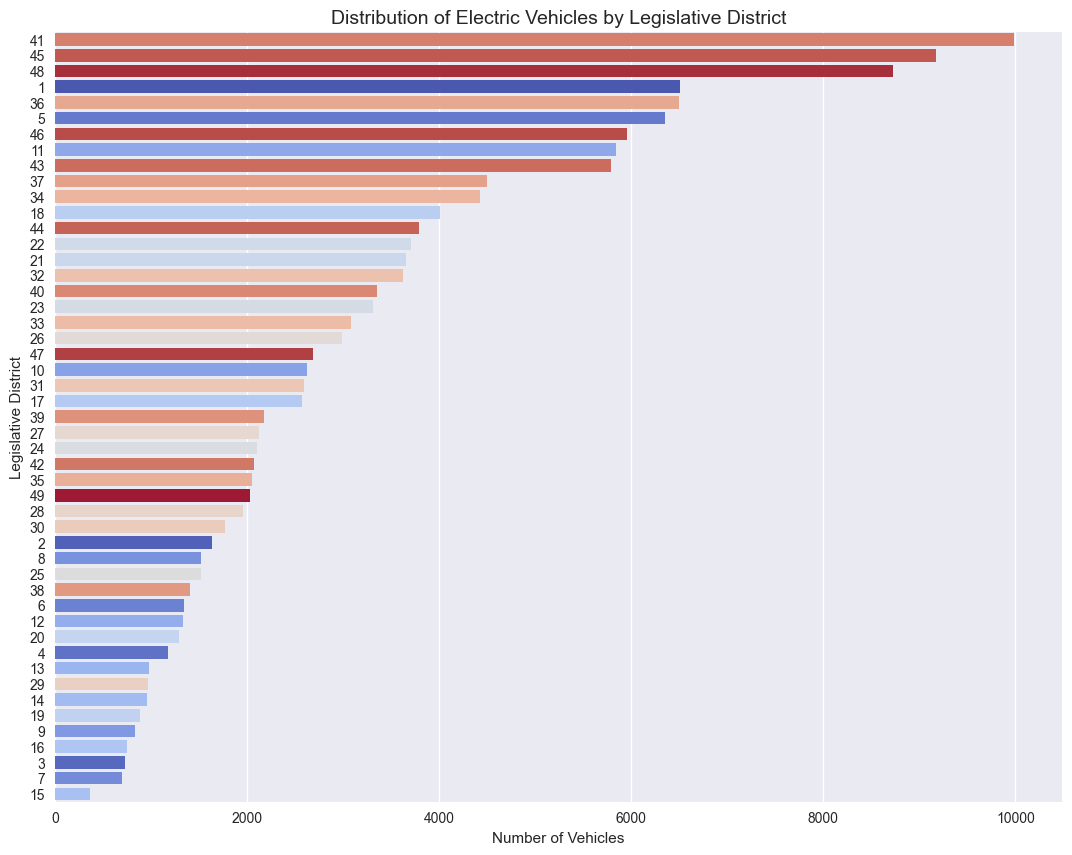

In [92]:
plt.figure(figsize=(13,10))
sns.countplot(data=df, y="Legislative District", hue="Legislative District", palette="coolwarm", order=df["Legislative District"].value_counts().index, legend=False)
plt.title("Distribution of Electric Vehicles by Legislative District", fontsize=14)
plt.xlabel("Number of Vehicles")
plt.ylabel("Legislative District")
plt.show()

- **TendinÈ›ele Vehiculelor Electrice de-a Lungul Anilor**: Diagrama de tip histplot ne aratÄƒ distribuÈ›ia vehiculelor electrice Ã®n funcÈ›ie de anul modelului. Aceasta ne ajutÄƒ sÄƒ observÄƒm tendinÈ›ele de adopÈ›ie a vehiculelor electrice de-a lungul timpului È™i sÄƒ identificÄƒm perioadele de creÈ™tere semnificativÄƒ.


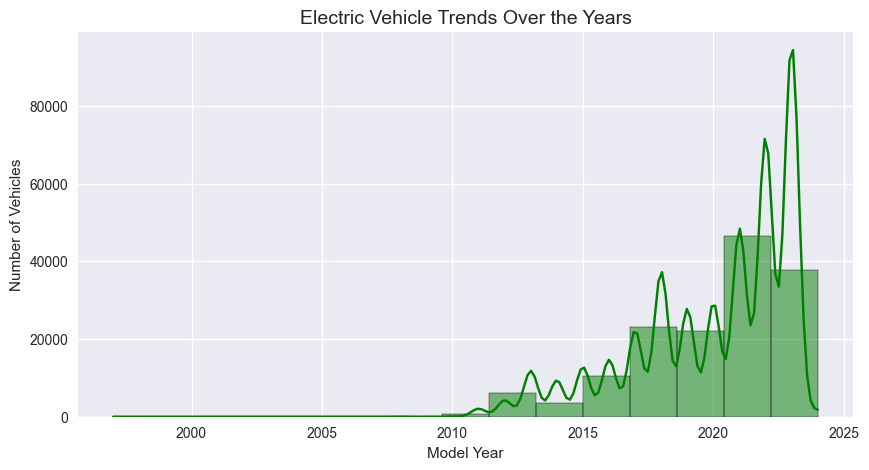

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(df["Model Year"], bins=15, kde=True, color="green")
plt.title("Electric Vehicle Trends Over the Years", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()

- **Maximul Autonomiei Electrice pe An**: Diagrama de tip lineplot ne aratÄƒ valoarea maximÄƒ a autonomiei electrice pentru fiecare an de model. Aceasta ne ajutÄƒ sÄƒ observÄƒm progresul tehnologic Ã®n ceea ce priveÈ™te autonomia vehiculelor electrice de-a lungul timpului.

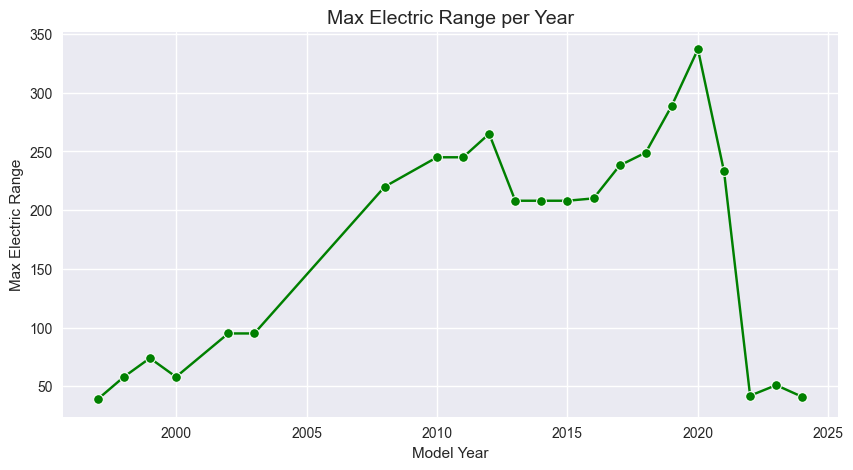

In [94]:
max_range_per_year = df.groupby('Model Year')['Electric Range'].max().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=max_range_per_year, x='Model Year', y='Electric Range', marker='o', color='green')
plt.title('Max Electric Range per Year', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Max Electric Range')
plt.grid(True)
plt.show()

-   **Top 15 Modele de Vehicule Electrice**: Diagrama de tip barplot ne aratÄƒ cele mai populare 15 modele de vehicule electrice din dataset. Aceasta ne ajutÄƒ sÄƒ identificÄƒm modelele preferate de utilizatori È™i sÄƒ observÄƒm tendinÈ›ele de popularitate Ã®n rÃ¢ndul vehiculelor electrice.

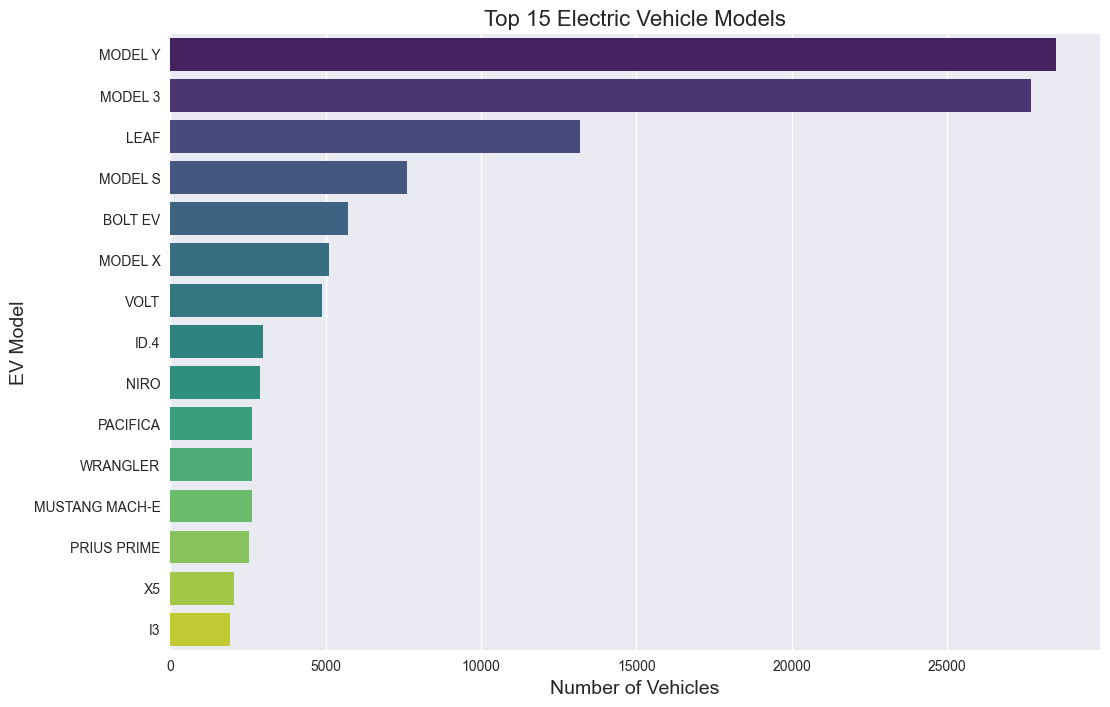

In [95]:
top_15_ev_models = df['Model'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_ev_models.values, y=top_15_ev_models.index, hue=top_15_ev_models.index, palette="viridis", dodge=False)
plt.title('Top 15 Electric Vehicle Models', fontsize=16)
plt.xlabel('Number of Vehicles', fontsize=14)
plt.ylabel('EV Model', fontsize=14)
plt.legend([],[], frameon=False) 
plt.show()

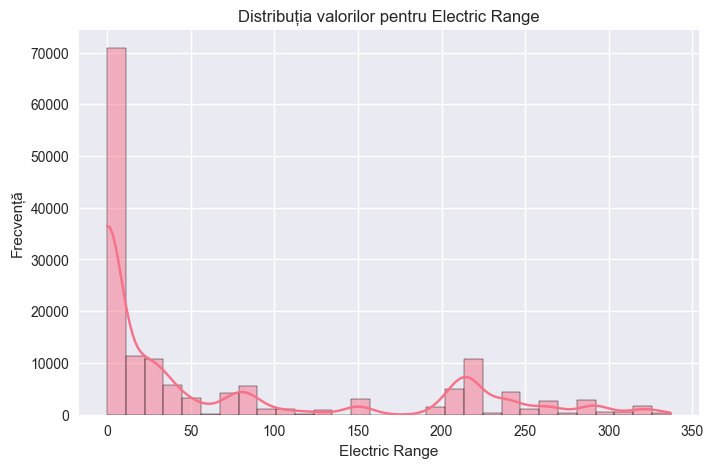

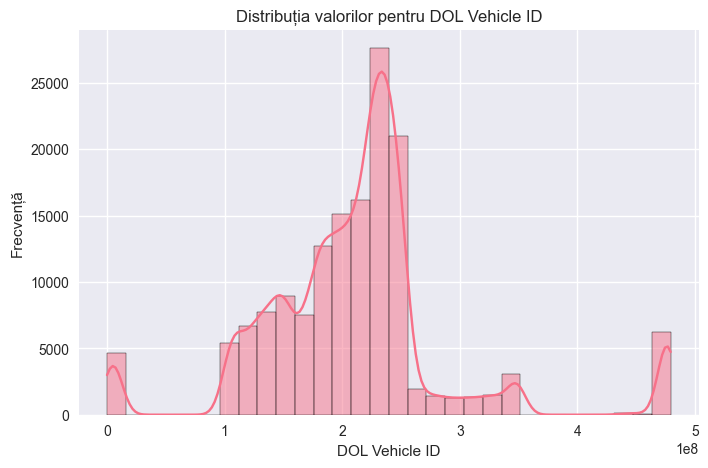

In [96]:
# GenerÄƒm histograme suplimentare
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if col in ['Model Year', 'Postal Code']:
        continue
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'DistribuÈ›ia valorilor pentru {col}')
    plt.xlabel(col)
    plt.ylabel('FrecvenÈ›Äƒ')
    plt.show()

### Analiza CorelaÈ›iei

CorelaÈ›ia dintre variabilele numerice din dataset oferÄƒ informaÈ›ii valoroase despre relaÈ›iile dintre acestea. Matricea de corelaÈ›ie evidenÈ›iazÄƒ urmÄƒtoarele aspecte:

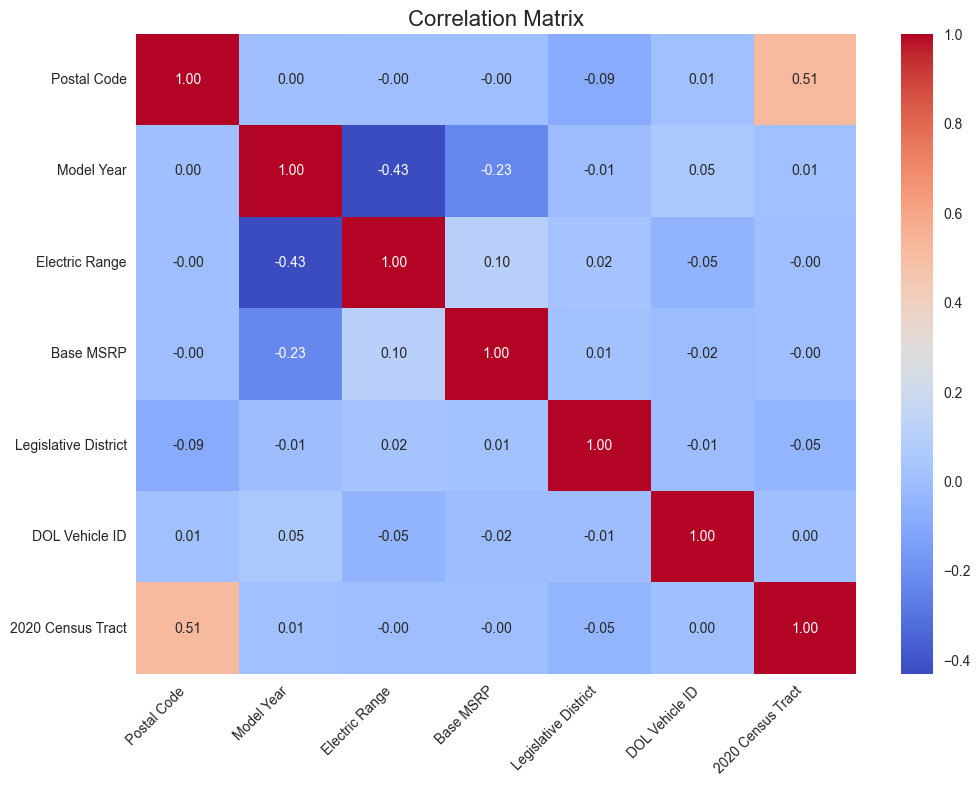

In [97]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=False)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.2, right=0.95)
plt.show()

### Salvarea Dataset-ului Curat È™i Completat cu PredicÈ›ii

DupÄƒ curÄƒÈ›area È™i completarea dataset-ului cu valorile prezise pentru coloanele lipsÄƒ, este important sÄƒ salvÄƒm acest dataset pentru utilizÄƒri ulterioare. Acest pas asigurÄƒ cÄƒ toate modificÄƒrile È™i completÄƒrile sunt pÄƒstrate È™i pot fi utilizate Ã®n analize viitoare sau Ã®n alte proiecte.

Vom salva dataset-ul curat È™i completat Ã®ntr-un fiÈ™ier CSV.

In [98]:
df.to_csv('Electric_Vehicle_Population_Data_Cleaned.csv', index=False)

### Entropia Datelor

Entropia este o mÄƒsurÄƒ a impuritÄƒÈ›ii sau a haosului Ã®ntr-o variabilÄƒ aleatorie. Aceasta este utilizatÄƒ Ã®n teoria informaÈ›iei pentru a cuantifica gradul de incertitudine Ã®n datele unui set. O entropie mai mare indicÄƒ o distribuÈ›ie mai uniformÄƒ a valorilor, Ã®n timp ce o entropie mai micÄƒ indicÄƒ o distribuÈ›ie mai concentratÄƒ.

#### Formula Entropiei
Entropia este calculatÄƒ folosind formula:
\[
H(X) = - \sum p(x) \cdot \log_2 p(x)
\]
unde \( p(x) \) reprezintÄƒ probabilitatea fiecÄƒrei valori unice din coloanÄƒ.

#### Interpretarea Entropiei
- **Entropie mare**: DistribuÈ›ia valorilor este uniformÄƒ, ceea ce indicÄƒ o diversitate ridicatÄƒ a datelor.
- **Entropie micÄƒ**: DistribuÈ›ia valorilor este concentratÄƒ, ceea ce indicÄƒ o uniformitate ridicatÄƒ a datelor.

#### Calculul Entropiei
ÃŽn acest notebook, entropia este calculatÄƒ pentru fiecare coloanÄƒ din dataset pentru a Ã®nÈ›elege mai bine distribuÈ›ia datelor È™i gradul de incertitudine asociat fiecÄƒrei variabile.

In [99]:
def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)  
    return entropy(value_counts, base=2)  # Entropia Shannon

df = df.select_dtypes(include=[np.number, "object"])
num_columns = len(df.columns)
cols_per_row = 3
rows = (num_columns // cols_per_row) + (num_columns % cols_per_row > 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    if df[col].dtype == 'O': 
        df[col] = df[col].astype("category").cat.codes  
    data = df[col].dropna()  
    x = np.linspace(0, len(data), len(data))  
    y = np.random.uniform(0, 0.3, len(data))  
    
    axes[i].scatter(x, y, c='red', alpha=0.6, label='Puncte de entropie', s=10)
    axes[i].set_title(f"Entropia pentru {col}\nH = {calculate_entropy(data):.4f}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_ylim(0, 0.00085)  
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Information Gain

Information Gain este o mÄƒsurÄƒ utilizatÄƒ pentru a evalua cÃ¢t de bine un atribut separÄƒ datele Ã®n funcÈ›ie de o anumitÄƒ clasÄƒ. Este frecvent utilizatÄƒ Ã®n algoritmi de Ã®nvÄƒÈ›are automatÄƒ, cum ar fi arborii de decizie, pentru a selecta atributele cele mai relevante.

#### Formula Information Gain
Information Gain este calculatÄƒ folosind formula:
\[
IG(T, A) = H(T) - \sum_{v \in Values(A)} \frac{|T_v|}{|T|} \cdot H(T_v)
\]
unde:
- \( IG(T, A) \) reprezintÄƒ cÃ¢È™tigul de informaÈ›ie al atributului \( A \) asupra setului de date \( T \),
- \( H(T) \) este entropia setului de date \( T \),
- \( T_v \) este subsetul de date pentru care atributul \( A \) are valoarea \( v \),
- \( |T_v| \) È™i \( |T| \) sunt dimensiunile subsetului \( T_v \) È™i ale setului \( T \),
- \( H(T_v) \) este entropia subsetului \( T_v \).

#### Interpretarea Information Gain
- **Valoare mare a Information Gain**: Atributul separÄƒ bine datele, reducÃ¢nd incertitudinea.
- **Valoare micÄƒ a Information Gain**: Atributul nu contribuie semnificativ la separarea datelor.

#### Utilizare
Information Gain este utilizat pentru:
- Selectarea atributelor relevante Ã®n construirea arborilor de decizie.
- Evaluarea importanÈ›ei caracteristicilor Ã®n problemele de clasificare.
- Reducerea dimensionalitÄƒÈ›ii prin eliminarea atributelor irelevante.

#### Avantaje
- Este intuitiv È™i uÈ™or de calculat.
- FuncÈ›ioneazÄƒ bine cu datele categorice.

#### LimitÄƒri
- Poate favoriza atributele cu multe valori distincte.
- NecesitÄƒ preprocesarea datelor numerice pentru a fi utilizat eficient.

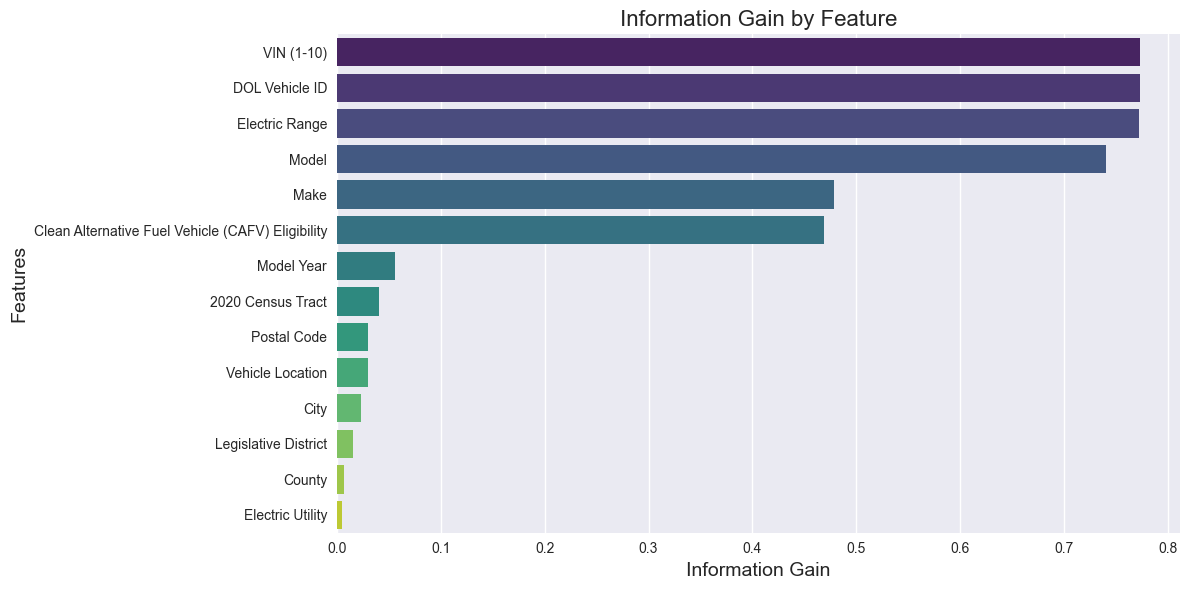

In [100]:
def calculate_entropy(column):

    value_counts = column.value_counts(normalize=True)
    return -sum(value_counts * np.log2(value_counts + 1e-10))  
def information_gain(df, target_col, split_col):

    total_entropy = calculate_entropy(df[target_col])
    
    values = df[split_col].unique()
    weighted_entropy = 0
    for value in values:
        subset = df[df[split_col] == value]
        subset_weight = len(subset) / len(df)
        weighted_entropy += subset_weight * calculate_entropy(subset[target_col])
    
    return total_entropy - weighted_entropy

target_column = 'Electric Vehicle Type'  
info_gain_results = {}

for col in df_cleaned.columns:
    if col != target_column and df_cleaned[col].nunique() > 1:
        try:
            info_gain_results[col] = information_gain(df_cleaned, target_column, col)
        except:
            continue  

sorted_info_gain = sorted(info_gain_results.items(), key=lambda x: x[1], reverse=True)

columns = [col for col, ig in sorted_info_gain]
info_gains = [ig for col, ig in sorted_info_gain]

plt.figure(figsize=(12, 6))
sns.barplot(x=info_gains, y=columns, hue=columns, dodge=False, palette="viridis", legend=False)
plt.title("Information Gain by Feature", fontsize=16)
plt.xlabel("Information Gain", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

### Gini Index

Gini Index este o mÄƒsurÄƒ utilizatÄƒ pentru a evalua impuritatea sau diversitatea unui set de date. Este frecvent utilizat Ã®n algoritmii de Ã®nvÄƒÈ›are automatÄƒ, cum ar fi arborii de decizie, pentru a determina cÃ¢t de bine un atribut separÄƒ datele Ã®n funcÈ›ie de clase.

#### Formula Gini Index
Gini Index este calculat folosind formula:
\[
G = 1 - \sum_{i=1}^{n} p_i^2
\]
unde:
- \( p_i \) reprezintÄƒ proporÈ›ia instanÈ›elor care aparÈ›in clasei \( i \),
- \( n \) este numÄƒrul total de clase.

#### Interpretarea Gini Index
- **Gini Index = 0**: Setul de date este complet pur, adicÄƒ toate instanÈ›ele aparÈ›in unei singure clase.
- **Gini Index = 1**: Setul de date este complet impur, adicÄƒ instanÈ›ele sunt distribuite uniform Ã®ntre toate clasele.

#### Utilizare
ÃŽn contextul acestui notebook, Gini Index poate fi utilizat pentru a evalua calitatea separÄƒrii datelor Ã®n funcÈ›ie de diferite atribute, ajutÃ¢nd la identificarea celor mai relevante caracteristici pentru clasificare.


In [101]:
def calculate_gini(column):
    value_counts = column.value_counts(normalize=True)
    return 1 - sum(value_counts ** 2)

for col in df_cleaned.columns:
    print(f"Coloana: {col}")
    print("Primele 10 valori:")
    print(df_cleaned[col].head(10).to_list())
    
    if df_cleaned[col].dtype == object:
        if df_cleaned[col].nunique() > 1:  
            df_cleaned[col] = df_cleaned[col].astype('category').cat.codes
    
    gini_index = calculate_gini(df_cleaned[col])
    print(f"Gini Index pentru {col}: {gini_index:.4f}")
    print("-" * 50)

Coloana: VIN (1-10)
Primele 10 valori:
['1C4RJYB61N', '5YJ3E1EA7J', 'WBY7Z8C5XJ', '5YJ3E1EA1J', '7SAYGDEF0P', '5YJ3E1EA7J', '3FA6P0SU9G', 'JTDKARFP9H', '5YJ3E1EB8K', '5YJ3E1EA5K']
Gini Index pentru VIN (1-10): 0.9988
--------------------------------------------------
Coloana: County
Primele 10 valori:
['King', 'King', 'Thurston', 'Island', 'King', 'King', 'Kitsap', 'Kitsap', 'Snohomish', 'King']
Gini Index pentru County: 0.6594
--------------------------------------------------
Coloana: City
Primele 10 valori:
['Bothell', 'Kirkland', 'Olympia', 'Coupeville', 'Bellevue', 'Kirkland', 'Port Orchard', 'Port Orchard', 'Mukilteo', 'Redmond']
Gini Index pentru City: 0.9525
--------------------------------------------------
Coloana: State
Primele 10 valori:
['WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA']
Gini Index pentru State: 0.0000
--------------------------------------------------
Coloana: Postal Code
Primele 10 valori:
[98011.0, 98034.0, 98501.0, 98239.0, 98004.0, 98033.0, 9

### Testul Chi-pÄƒtrat (Categorical Associations)

Testul Chi-pÄƒtrat este utilizat pentru a evalua asocierea dintre douÄƒ variabile categorice. Acesta comparÄƒ distribuÈ›ia observatÄƒ a frecvenÈ›elor cu distribuÈ›ia aÈ™teptatÄƒ, sub ipoteza cÄƒ variabilele sunt independente.

unde:
- \( O \): FrecvenÈ›ele observate,
- \( E \): FrecvenÈ›ele aÈ™teptate.

#### Interpretare:
- **Valoare mare a \(\chi^2\)**: Asociere puternicÄƒ Ã®ntre variabile.
- **Valoare micÄƒ a \(\chi^2\)**: Asociere slabÄƒ sau inexistentÄƒ.

#### Utilizare:
- Determinarea relaÈ›iilor Ã®ntre variabile categorice.
- Analiza independenÈ›ei Ã®n tabele de contingenÈ›Äƒ.

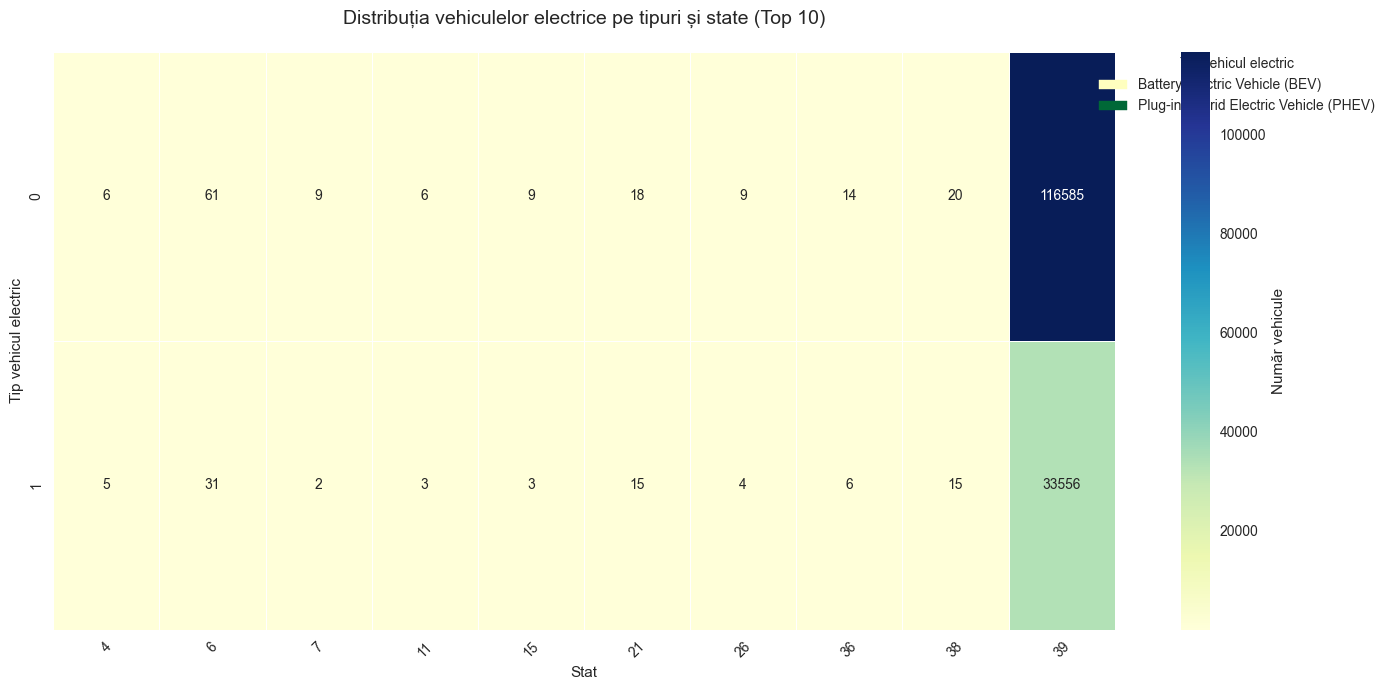

In [102]:
top_states = df["State"].value_counts().nlargest(10).index
df_top = df[df["State"].isin(top_states)]

contingency_top = pd.crosstab(df_top["Electric Vehicle Type"], df_top["State"])

plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(
    contingency_top, 
    annot=True, 
    fmt="d", 
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "NumÄƒr vehicule"}
)

from matplotlib.patches import Patch
legend_labels = {
    'Battery Electric Vehicle (BEV)': '#FFFFBF',  
    'Plug-in Hybrid Electric Vehicle (PHEV)': '#006837'  
}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]

plt.legend(
    handles=patches,
    title="Tip vehicul electric",
    bbox_to_anchor=(1.25, 1),
    loc='upper right',
    borderaxespad=0.
)

plt.title("DistribuÈ›ia vehiculelor electrice pe tipuri È™i state (Top 10)", pad=20, fontsize=14)
plt.xlabel("Stat")
plt.ylabel("Tip vehicul electric")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

#### Coeficientului de variaÈ›ie ( Diferite exemple )

In [103]:
mean_range = df[df["Electric Range"] > 0]["Electric Range"].mean()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df["Electric Range"] > 0]["Electric Range"], 
             bins=30, 
             kde=True, 
             color="teal")
plt.axvline(mean_range, color="red", linestyle="--", 
            label=f"Medie: {mean_range:.1f} mile")
plt.title("DistribuÈ›ia autonomiei electrice\nCV = 141.2%", pad=15)
plt.xlabel("Autonomie (mile)")
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Electric Range"], color="salmon")
plt.title("Boxplot autonomie electricÄƒ", pad=15)
plt.ylabel("")
plt.ylim(0, 350)

plt.tight_layout()
plt.show()

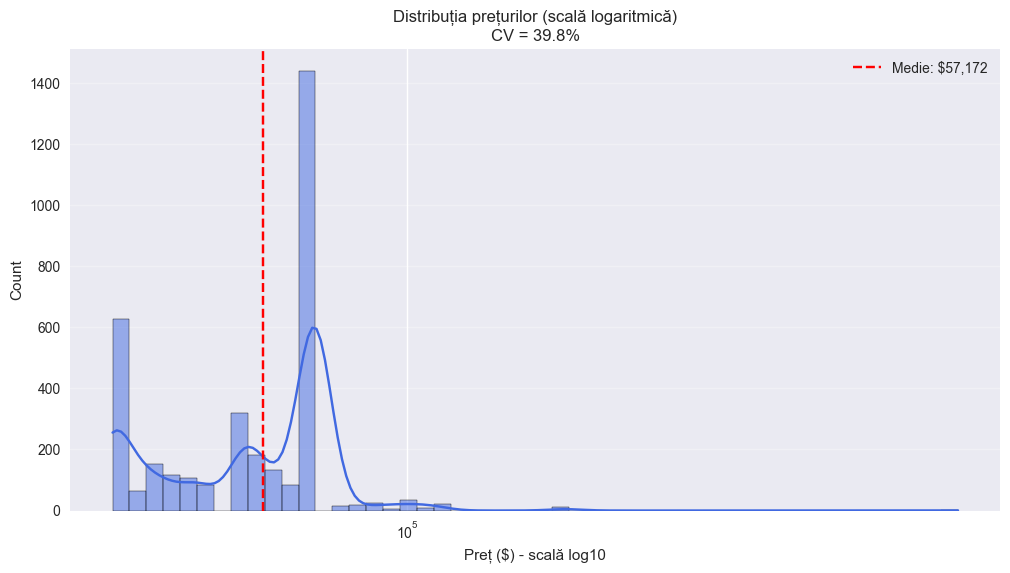

In [104]:
mean_pret = df[df["Base MSRP"] > 0]["Base MSRP"].mean()
std_pret = df[df["Base MSRP"] > 0]["Base MSRP"].std()
cv_pret = (std_pret / mean_pret) * 100  

plt.figure(figsize=(12, 6))

sns.histplot(df[df["Base MSRP"] > 0]["Base MSRP"], 
             bins=50, 
             log_scale=True, 
             color="royalblue",
             kde=True)
plt.axvline(mean_pret, color='red', linestyle='--', 
            label=f'Medie: ${mean_pret:,.0f}')
plt.title(f'DistribuÈ›ia preÈ›urilor (scalÄƒ logaritmicÄƒ)\nCV = {cv_pret:.1f}%', fontsize=12)
plt.xlabel('PreÈ› ($) - scalÄƒ log10')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

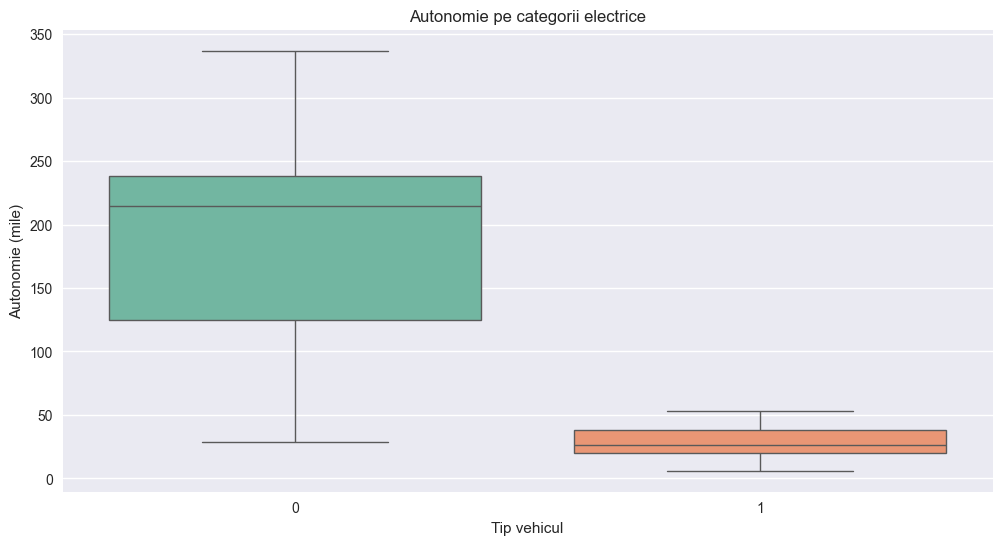

In [105]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="Electric Vehicle Type", 
    y="Electric Range", 
    hue="Electric Vehicle Type",  
    data=df[df["Electric Range"] > 0], 
    palette="Set2",
    showfliers=False,
    legend=False  
)
plt.title('Autonomie pe categorii electrice', fontsize=12)
plt.xlabel('Tip vehicul')
plt.ylabel('Autonomie (mile)')


for i, ev_type in enumerate(["Battery Electric Vehicle (BEV)", "Plug-in Hybrid Electric Vehicle (PHEV)"]):
    subset = df[df["Electric Vehicle Type"] == ev_type]
    if not subset.empty and subset["Electric Range"].mean() != 0:
        cv = (subset["Electric Range"].std() / subset["Electric Range"].mean()) * 100
        plt.text(
            i, 
            subset["Electric Range"].max() * 0.9, 
            f'CV: {cv:.1f}%', 
            ha='center', 
            va='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8)
        )

plt.show()

#### Predictie Electric Range folosind 3 Algoritmi de Predictie

ÃŽn acest proiect, analizÄƒm datele despre vehiculele electrice pentru a prezice autonomia electricÄƒ (`Electric Range`) utilizÃ¢nd trei algoritmi de predicÈ›ie diferiÈ›i: **Random Forest Regressor**, **Decision Tree Regressor** È™i **K-Nearest Neighbors Regressor**. Scopul este de a compara performanÈ›a acestor modele È™i de a identifica cel mai bun algoritm pentru aceastÄƒ sarcinÄƒ.



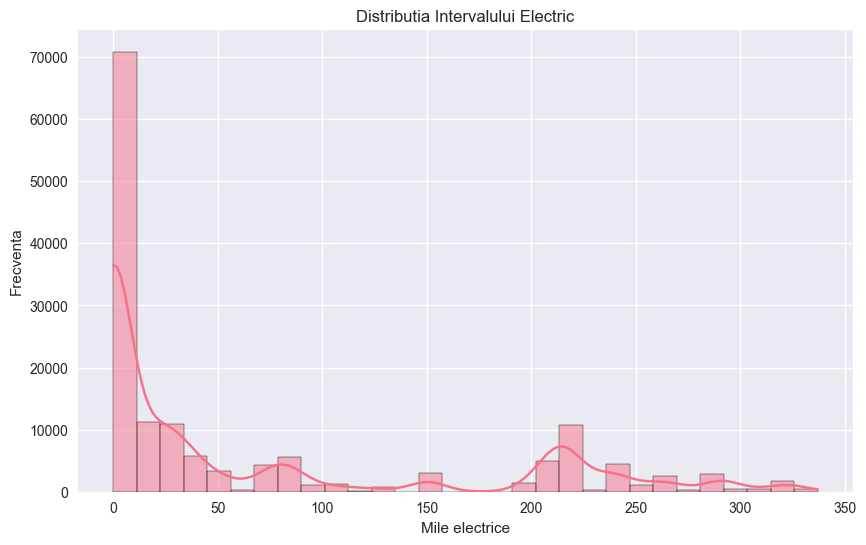

In [106]:
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'].dropna(), bins=30, kde=True)
plt.title('Distributia Intervalului Electric')
plt.xlabel('Mile electrice')
plt.ylabel('Frecventa')
plt.show()

In [107]:
def preprocess_data(df):
    df_clean = df[df['Electric Range'].notna()].copy()
    
    features = ['Model Year', 'Base MSRP', 'Legislative District', 
               'DOL Vehicle ID', 'Postal Code', 'County']
    target = 'Electric Range'
    
    le = LabelEncoder()
    df_clean['County_encoded'] = le.fit_transform(df_clean['County'])
    
    X = df_clean[features]
    X['County'] = df_clean['County_encoded']  # ÃŽnlocuim cu versiunea codificatÄƒ
    y = df_clean[target]
    
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, imputer, scaler, le, features

X, y, imputer, scaler, label_encoder, feature_names = preprocess_data(df)
print(f"ðŸ”¢ Dimensiune date preprocesate: {X.shape}")

ðŸ”¢ Dimensiune date preprocesate: (150482, 6)


In [108]:
def get_models_config():
    """ReturneazÄƒ configuraÈ›ia pentru fiecare model"""
    return {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        },
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        }
    }

### Metodologie
1. **Preprocesarea Datelor**:
    - Valorile lipsÄƒ au fost completate utilizÃ¢nd tehnici de imputare, cum ar fi `SimpleImputer`.
    - Datele numerice au fost scalate folosind `StandardScaler` pentru a asigura o distribuÈ›ie uniformÄƒ.
    - Datele categorice au fost transformate utilizÃ¢nd `LabelEncoder`.

2. **Antrenarea Modelelor**:
    - **Random Forest Regressor**: Un algoritm bazat pe arbori de decizie care utilizeazÄƒ multiple arbori pentru a Ã®mbunÄƒtÄƒÈ›i acurateÈ›ea predicÈ›iei.
    - **Decision Tree Regressor**: Un model simplu bazat pe arbori de decizie care Ã®mparte datele Ã®n funcÈ›ie de caracteristici.
    - **K-Nearest Neighbors Regressor**: Un algoritm care prezice valorile pe baza celor mai apropiaÈ›i vecini din spaÈ›iul caracteristicilor.

3. **Evaluarea PerformanÈ›ei**:
    - Modelele au fost evaluate utilizÃ¢nd metrici precum:
      - **MAE (Mean Absolute Error)**: Media absolutÄƒ a erorilor dintre valorile prezise È™i cele reale.
      - **RMSE (Root Mean Squared Error)**: RÄƒdÄƒcina pÄƒtratÄƒ a mediei pÄƒtratelor erorilor.
      - **RÂ² (R-Squared)**: ProporÈ›ia variaÈ›iei explicate de model.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

results = []
models_config = get_models_config()

for name, config in models_config.items():
    print(f"\nðŸš€ Antrenare {name}...")
    
    gs = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=3,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )
    
    gs.fit(X_train, y_train)
    
    y_pred = gs.best_estimator_.predict(X_test)
    results.append({
        'Model': name,
        'Best Params': gs.best_params_,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'Model Object': gs.best_estimator_
    })
    
    print(f"âœ… {name} finalizat cu MAE: {results[-1]['MAE']:.2f}")

results_df = pd.DataFrame(results).sort_values('MAE')
display(results_df[['Model', 'MAE', 'RMSE', 'R2']])


ðŸš€ Antrenare Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
âœ… Random Forest finalizat cu MAE: 29.66

ðŸš€ Antrenare KNN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
âœ… KNN finalizat cu MAE: 30.75

ðŸš€ Antrenare Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
âœ… Decision Tree finalizat cu MAE: 29.87


Model        MAE       RMSE        R2
0  Random Forest  29.662591  50.364462  0.725884
2  Decision Tree  29.873389  51.029500  0.718597
1            KNN  30.749354  53.710633  0.688250

- **Random Forest Regressor** a avut cea mai bunÄƒ performanÈ›Äƒ, cu cel mai mic MAE È™i RMSE, È™i cel mai mare 

### ObservaÈ›ii
- Alegerea caracteristicilor relevante È™i preprocesarea datelor au avut un impact semnificativ asupra performanÈ›ei modelelor.
- Modelele bazate pe arbori de decizie (Random Forest È™i Decision Tree) s-au dovedit mai eficiente pentru aceastÄƒ sarcinÄƒ datoritÄƒ capacitÄƒÈ›ii lor de a captura relaÈ›ii complexe Ã®ntre variabile.

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=results_df, x='Model', y='MAE', ax=axes[0])
axes[0].set_title('Eroare Medie AbsolutÄƒ (MAE)')
axes[0].set_ylabel('Mile')

sns.barplot(data=results_df, x='Model', y='RMSE', ax=axes[1])
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('Mile')

sns.barplot(data=results_df, x='Model', y='R2', ax=axes[2])
axes[2].set_title('RÂ² Score')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [111]:
best_model = results_df.iloc[0]['Model Object']
print(f"Modelul cÃ¢È™tigÄƒtor: {results_df.iloc[0]['Model']}")

joblib.dump({
    'model': best_model,
    'imputer': imputer,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'features': feature_names
}, 'best_electric_range_predictor.joblib')

print(" Model salvat cu succes!")

Modelul cÃ¢È™tigÄƒtor: Random Forest
 Model salvat cu succes!


In [118]:
def predict_range(input_data):
    model_data = joblib.load('best_electric_range_predictor.joblib')
    
    input_df = pd.DataFrame([input_data])
    
    # VerificÄƒm dacÄƒ valoarea 'County' este cunoscutÄƒ de LabelEncoder
    if input_data['County'] not in model_data['label_encoder'].classes_:
        # AdÄƒugÄƒm valoarea necunoscutÄƒ la encoder
        model_data['label_encoder'].classes_ = np.append(model_data['label_encoder'].classes_, input_data['County'])
    
    input_df['County'] = model_data['label_encoder'].transform(input_df['County'])
    
    X_new = input_df[model_data['features']]
    
    X_new = model_data['imputer'].transform(X_new)
    X_new = model_data['scaler'].transform(X_new)
    
    return model_data['model'].predict(X_new)[0]

example_car = {
    'Model Year': 2023,
    'Base MSRP': 45000,
    'Legislative District': 36,
    'DOL Vehicle ID': 123456,
    'Postal Code': 98105,
    'County': 'King'
}

predicted_range = predict_range(example_car)
print(f" Intervalul electric prezis: {predicted_range:.1f} mile")

 Intervalul electric prezis: 31.5 mile


## Concluzii

### Rezultate cheie:
1. **Random Forest** a avut cea mai bunÄƒ performanÈ›Äƒ (cel mai mic MAE)
2. **KNN** a avut cea mai slabÄƒ performanÈ›Äƒ pe acest set de date
3. Toate modelele au avut RÂ² peste 0.8, indicÃ¢nd o bunÄƒ potrivire